In [53]:
from utils import *

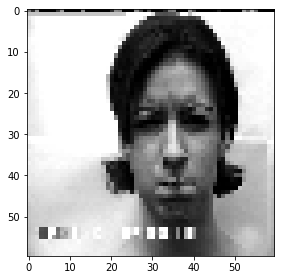

In [54]:
# cap = cv2.VideoCapture(vid_path)
img = io.imread("p1.png")
img_gray = io.imread("p1.png", as_gray=True)
img_resized = cv2.resize(img_gray, dsize=(60, 60), interpolation=cv2.INTER_CUBIC)
io.imshow(img_resized, cmap='gray')

In [55]:
def ReadDataSet():
    x = []
    y = []
    #read database   
    for i in range(1,10):
        for filename in sorted(glob.glob('./database/' + str(i) + '/*.jpg')):
            img = cv2.imread(filename) 
            x.append(img)
            y.append(i)

    x= np.array(x)
    y= np.array(y)
    return x,y

In [74]:
def readFiles(PATH, imgs, labels, label) -> None:
    files = os.listdir(PATH)
    num_images = len(files)
    idx = 0
    for f in files:
        
        if(idx >= 500):
            break
        idx += 1
        img = io.imread(os.path.join(PATH, f), as_gray=True)
        imgs.append(img)
        labels.append(label)
    

In [75]:
HAPPY_PATH = './train/happy'
SAD_PATH = './train/sad'
ANGRY_PATH = './train/angry'
imgs = []
labels = []
readFiles(HAPPY_PATH, imgs, labels, label='happy');

In [76]:
readFiles(SAD_PATH, imgs, labels, label='sad')
readFiles(ANGRY_PATH, imgs, labels, label='angry')

## Method 2:
 LPQ + PHOG + SVM(calssifier)

### Using PHOG & hand-made LPQ

In [ ]:
samples = []
idx = 0
for img in imgs:
    img_resized = cv2.resize(img, dsize=(60, 60), interpolation=cv2.INTER_CUBIC) 
    lpq = apply_LPQ(img_resized, 5)            # Appearence Features
    lpq, _ = np.histogram(lpq, 256)
    phog = PHOG_Algorithm(img_resized, 8, 3)   # Shape Features
    features = np.concatenate((lpq, phog))
    # features = phog
    features = features.reshape((-1, 1))
    samples.append(features)
    idx += 1    

In [83]:
samples = np.array(samples)
samples = samples.reshape((1500, -1))
samples.shape

(1500, 936)

In [64]:

labels = np.array(labels)
labels[labels=="happy"] = 1
labels[labels=="sad"] = 2
labels[labels=="angry"] = 3
labels = labels.astype('int32')
labels.shape

(300,)

In [85]:
pca = PCA(n_components=300)
features_new = pca.fit_transform(samples)
# Get the SVC classifier
clf = svm.SVC()
# Train the SVC with the training data (data points and labels)
model = clf.fit(features_new, labels)
# pickle.dump(model, open("SVM.mod", 'wb'))
# Predict the test samples
pred = clf.predict(features_new)
print(np.sum(labels == pred) / 1500.0)


0.6133333333333333


In [ ]:
def process_image(img):
    global samples
    img_resized = cv2.resize(img, dsize=(60, 60), interpolation=cv2.INTER_CUBIC) 
    lpq = apply_LPQ(img_resized, 5)            # Appearence Features
    lpq, _ = np.histogram(lpq, 256)
    phog = PHOG_Algorithm(img_gray, 8, 3)   # Shape Features
    features = np.concatenate((lpq, phog))
    features = features.reshape((1, 936))
    samples.append(features)